# COGS 108 - Final Project - Analyzing the Correlation Between Gold Lead and Match Outcome Across Different League of Legends Leagues

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [  ] NO - keep private

# Overview

# Names

- Justin Chu 
- John Li
- Luke Lloyd
- Prathik Malireddy
- Dustin Lin

<a id='research_question'></a>
# Research Question

In the competivite League of Legends video game scene, is there a difference in how well teams across different leagues can close out games when having an advantage (gold lead) at 20 minutes?

<a id='background'></a>

## Background & Prior Work

## Background

### What is "League of Legends"?

For anyone blessed enough to not know what League of Legends is, let me ruin that for you. League of Legends is a 5v5 online competitive game where before each match, each player picks a *champion* to play as. The 10 champions interact with each other and other neutral monsters/minions in a large square arena (often called the *map*). Each game usuaslly begins with players spread across the map in what are called *lanes*, gaining gold and experience by killing neutral monsters and minions in order to get stronger. Each game is played between 2 teams (a *blue* team and a *red* team) each consisting of 5 players.


Throughout the course of a game the players on each team attempt to gain an advantage over their opponents by gaining gold and experience at a faster rate. With more gold and experience, members of each time can buy items and level up to become stronger than their opponents. With the ultimate goal of destroying the opposing team's base, which is located at the ends of the map/playing field, it is paramount that a team gets an advantage.

Gold and experience are gained by getting kills on enemy players, destroying pieces of the enemy’s base (ie: turrets and inhibitors), killing epic monsters that spawn every five minutes as a team (ie: Baron and dragons), and finally by killing creeps (minions that fight for each team and neutral monsters that are distributed around the map). The game is decided when one team reaches the back of the other team’s base and destroys their *Nexus*.

### The League of Legends (LoL) competitive scene

The League of Legends competitive scene (sometimes called the *professional scene* or *pro scene*) consists of different teams of 5 players each (and typically a coach as well as supporting staff) competing against other teams in a circuit seperated by regions. For example, the north america regional circuit contains around 10 teams with players mostly coming from the US and Canada. Other regions that we will look at include Europe, Korea, and southeast asia. There are often international tournements where teams from different regions come together to compete and decide which region has the best teams and players. *Leagues* refers to the different regional circuits described above. For example, the north american league is referred to as *NALCS*, the european league *EULCS*, the korean's *LCK*, and southeast asia *LMS* just to name a few.


As a group, we noticed from our League of Legends playing and watching experience that there is usually a certain point in any specific game where it seems unwinnable for one team. We are interested in how often teams in each region can close out matches that they are already winning. We think that how effective teams are at snowballing their lead and closing out games can be a proxy for their overall skill level.

### Choice of parameters for research question

We chose to use gold as a proxy for determining which team was "winning" at any given point because it both summarizes each team’s performance up until that point and correlates directly with the strength of each team (since individuals can purchase items with their gold which makes their characters stronger), which isn’t something that can be measured on its own.

We chose to measure which team was winning at 20 minutes into the match because in our experience, by this time one team usually has a measurable and meaningful lead over the other. In a League of Legends game, 20 minutes is usually when team members leave their *lanes* and begin to group together as 5 team members in order to team up and take down objectives across the map. We affrimed this choice in our EDA section by noticing that a vast majority of obersvations (where each observation is a game) in the dataset last longer than 20 minutes, with the average game time somewhere between 35 and 40 minutes.



### Prior Work

1) Using the data set, Leonardo Fuchs computed a prediction of which team will win a match when a particular team is playing. They focused on a particular North American team (Cloud9). We consider our work marginally related as we are looking at which teams win certain matches based on their leads. However we are not doing a prediction.

2) Chuck Ephron used the data set to compute a heat map of win percentages by gold lead and time for every game in the dataset. They explored a team’s chance of winning based on what gold lead they had at a certain time. We consider our work to be related as we are also looking into how teams are using their gold lead advantage to win the game, but we are doing so across different regions/statistics, not all of the games in the dataset.


References (include links):
- 1) https://www.kaggle.com/leofuchs/predicting-who-will-win-cloud9-matches-in-lol
- 2) https://www.kaggle.com/chuckephron/win-percent-by-gold-lead-and-time-heat-map

# Hypothesis


**Hypothesis:** We expect there to be difference across leagues in how well teams can close out games when having a gold lead at 20 minutes.

Form our knowledge of the game, we know that there exists different skill levels among teams across the different leagues. One can also analyze the differences in skill level across leagues by looking at which team wins international tournements. Since there are differences in skill across the different leagues, we believe that teams of a certain league are more efficient and skillful when trying to win a game given that they already have a lead.

# Dataset(s)

- Dataset Name: League of Legends
- Link to the dataset: https://www.kaggle.com/chuckephron/leagueoflegends?select=LeagueofLegends.csv
- Number of observations: 7620 (where each observation is a game between 2 teams)

This dataset includes competitive matches between 2015-2018. The leagues in the dataset are LCK, NALCS, EULCS, LMS, TCL, OPL, WC, CBLoL, LCL, LJL, LLN, CLS, IEM, MSI, and RR. Some of the leagues corrospond to international events, which will need to be excluded. The data also contains the gold difference by minute and the winner of each game.

# Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
from scipy.stats import binom

In [2]:
raw_dataset = pd.read_csv('data/LeagueofLegends.csv')

In [3]:
raw_dataset.shape

(7620, 57)

In [4]:
dataset = raw_dataset.copy()

# Data Cleaning

Describe your data cleaning steps here.

We first removed games that ended before 20 minutes. We consdier these games to be outliers since the games ended much quicker than average.

In [5]:
dataset = dataset[dataset.gamelength > 20]

Next we made a new column *golddiff_20min* that contains the gold difference at 20 minutes between each team where the gold difference = blue team - red team.

In [6]:
dataset['golddiff_20min'] = dataset.golddiff.str[1:-1].str.split(', ').apply(lambda x: int(x[20]))

We renamed the column *'bResult'* which contains a boolean indicating if the blue team won the match or not to *'blue_win'* for clairity.

In [7]:
dataset.rename({'bResult': 'blue_win'}, axis=1, inplace=True)
dataset.rename({'rResult': 'red_win'}, axis=1, inplace=True)

dataset[['League', 'Year', 'golddiff_20min']].pivot_table(index='League', columns='Year', aggfunc='count')

dataset = dataset[dataset.League.isin(['LCK', 'NALCS', 'EULCS', 'LMS', 'TCL', 'OPL', 'CBLoL', 'LCL', 'LJL', 'LLN', 'CLS'])]


# The outputed values below represent the observations we have for each region.
# Recall that each obervation is a match, which we know lasts for at least 20 minutes.
dataset.League.value_counts()


# dataset = dataset[['League', 'Year', 'Type', 'blue_win', 'golddiff_20min']]

LCK      1445
NALCS    1269
EULCS    1099
LMS       777
TCL       652
OPL       456
CBLoL     301
LCL       279
LJL       258
LLN       241
CLS       175
Name: League, dtype: int64

In [8]:
dataset.head()

,League,Year,Season,Type,blueTeamTag,blue_win,red_win,redTeamTag,gamelength,golddiff,...,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address,golddiff_20min
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...,987
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...,205
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...,4597
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...,2712
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...,926


In [9]:
dataset = dataset[['League', 'Year', 'Type', 'blue_win', 'golddiff_20min']]

Given the size of the dataset, it's best if we contain the columns to only what's needed

In [10]:
def attribute_win(row):
    blue_win = row['blue_win']
    blue_diff = int(row['golddiff_20min'] > 0)
    
    if blue_win == blue_diff:
        return 1
    
    return 0

In [11]:
dataset = dataset.assign(diff_win = dataset.apply(attribute_win, axis=1))

See if a higher gold difference is associated with the win

In [12]:
dataset.head()

,League,Year,Type,blue_win,golddiff_20min,diff_win
0,NALCS,2015,Season,1,987,1
1,NALCS,2015,Season,0,205,0
2,NALCS,2015,Season,1,4597,1
3,NALCS,2015,Season,0,2712,0
4,NALCS,2015,Season,1,926,1


# Data Analysis & Results

### Exploratory Data Analysis

In [13]:
eda_dataset = raw_dataset.copy()

We were interested at looking at the distribution of game lengths for each region. Perhaps some regions played longer or shorter games due to different playstyles. Out of the 4 regions with the most observations, the distribution seems pretty similar.

[Text(0.5, 0, 'Game time in minutes of LMS games')]

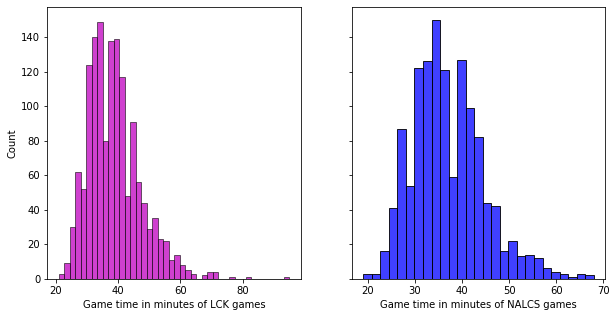

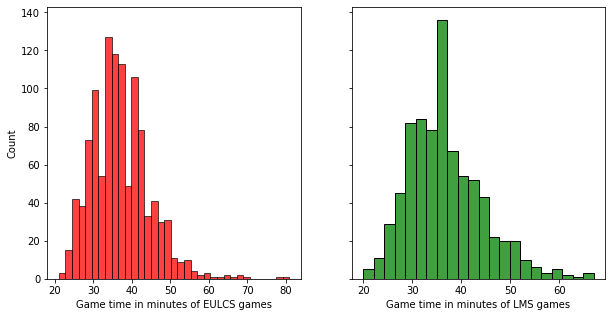

In [14]:
## hist grams for each region
dataset_LCK = eda_dataset[eda_dataset['League'] == 'LCK']
dataset_NALCS = eda_dataset[eda_dataset['League'] == 'NALCS']
dataset_EULCS = eda_dataset[eda_dataset['League'] == 'EULCS']
dataset_LMS = eda_dataset[eda_dataset['League'] == 'LMS']


fig, ((ax1, ax2)) = plt.subplots(ncols=2, sharey=True, figsize=(10,5))

# dataset_LCK['gamelength'].plot.hist(xlabel='Game time in minutes')
sns.histplot(data=dataset_LCK, x='gamelength', ax=ax1,  color='m',  )

sns.histplot(data=dataset_NALCS, x='gamelength', ax=ax2, color='b' )

ax1.set(xlabel='Game time in minutes of LCK games')
ax2.set(xlabel='Game time in minutes of NALCS games')


fig2, (ax1_2, ax2_2) = plt.subplots(ncols=2, sharey=True, figsize=(10,5))

# dataset_LCK['gamelength'].plot.hist(xlabel='Game time in minutes')
sns.histplot(data=dataset_EULCS, x='gamelength', ax=ax1_2,  color='r',  )

sns.histplot(data=dataset_LMS, x='gamelength', ax=ax2_2, color='g' )

ax1_2.set(xlabel='Game time in minutes of EULCS games')
ax2_2.set(xlabel='Game time in minutes of LMS games')


To help compare the averages, we created a barplot (this time with all the different regions included). This backed our discoverey in the hist-plots above that the average game times acorss all observations is around 35-40 minutes

[Text(0.5, 0, 'Average game length in minutes')]

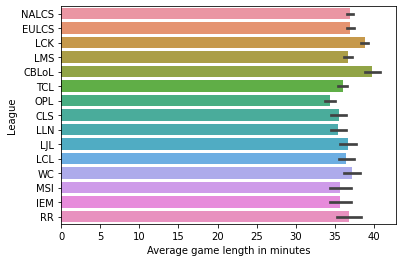

In [15]:
avg_game_time = sns.barplot(data = eda_dataset, y = 'League', x = 'gamelength')
avg_game_time.set(xlabel='Average game length in minutes')

Next we were curious what the average gold load at 20 mintues (the new column we created), would this be similar acorss the board like the average game time?

In [16]:
eda_dataset = eda_dataset[eda_dataset.gamelength > 20]

eda_dataset['golddiff_20min'] = eda_dataset.golddiff.str[1:-1].str.split(', ').apply(lambda x: int(x[20]))

eda_dataset.rename({'bResult': 'blue_win'}, axis=1, inplace=True)

eda_dataset[['League', 'Year', 'golddiff_20min']].pivot_table(index='League', columns='Year', aggfunc='count')

eda_dataset = eda_dataset[eda_dataset.League.isin(['LCK', 'NALCS', 'EULCS', 'LMS', 'TCL', 'OPL', 'CBLoL', 'LCL', 'LJL', 'LLN', 'CLS'])]

eda_dataset.League.value_counts()

LCK      1445
NALCS    1269
EULCS    1099
LMS       777
TCL       652
OPL       456
CBLoL     301
LCL       279
LJL       258
LLN       241
CLS       175
Name: League, dtype: int64

[Text(0.5, 0, 'Average gold lead at 20 min')]

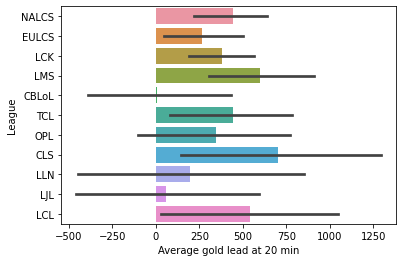

In [17]:
avg_gold_lead_20 = sns.barplot(data = dataset, y = 'League', x = 'golddiff_20min')
avg_gold_lead_20.set(xlabel='Average gold lead at 20 min')
# this kinda sucks, hard to look at (positive and negative refer to gold leads for the 2 different teams)

Ok we messed up here becuase we forgot to take into account that the "gold" lead can be negative or positive depending on which team color (red or blue) is ahead. What we really want to look at is just the gold lead independent of which team is actually ahead. To do this we take the absolute value.

[Text(0.5, 0, 'Average gold lead of a team at 20 min')]

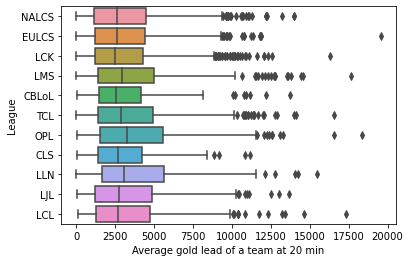

In [18]:
# want to create a new column that includes the abs value of the gold lead
# we are just interested to see how ahead a team is, not caring about which team
eda_dataset['golddiff_20min_abs'] = dataset['golddiff_20min'].abs()
avg_gold_lead_20 = sns.boxplot(data = eda_dataset, y='League', x='golddiff_20min_abs')
avg_gold_lead_20.set(xlabel='Average gold lead of a team at 20 min')

To take one more step closer to answering out research question, we wanted to look at if a team who was ahead 20 minutes in-game, if they actually won the game at the end of it. We wanted to create a boleean for each observation.

In [19]:
# want to create a new column of indicators of if the team had a lead at 20 minutes and ended up wining the game
win_given_20min_golddiff= (eda_dataset['blue_win'] == 1) == (eda_dataset['golddiff_20min'] > 0)
win_given_20min_golddiff

0        True
1       False
2        True
3       False
4        True
        ...  
7615     True
7616     True
7617     True
7618     True
7619    False
Length: 6952, dtype: bool

What we actually want to display in a barplot is the win percentage, or the mean of all these True/False indicator variables that we created above (seperated by region).

In [20]:
eda_dataset['win_given_20min_golddiff'] = win_given_20min_golddiff

league_winrate_given_lead_20 = eda_dataset.groupby('League')['win_given_20min_golddiff'].mean().to_frame().reset_index()

Note that in the plot below, we are mostly interesed in the "percentage rate" gained, which would be the win percentage - 50%. We are looking into how more likely are teams to win if they have an advatage.

[Text(0.5, 0, 'Win percentage of teams given that they have a gold lead at 20 minutes')]

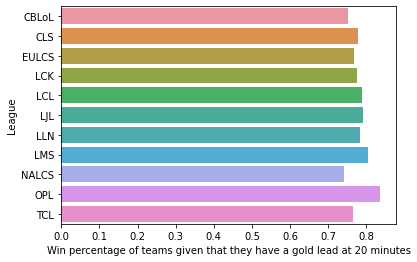

In [21]:
winrate_plot = sns.barplot(data=league_winrate_given_lead_20, y='League', x='win_given_20min_golddiff')
winrate_plot.set(xlabel='Win percentage of teams given that they have a gold lead at 20 minutes')

# this seems pretty high, lets see about gold leads at different times

After looking at 20 minutes, we wondered if patterns would be different at 10 minutes. We applied the same techniques to generat the 10 minute graph.

[Text(0.5, 0, 'Win percentage of teams given that they have a gold lead at 10 minutes')]

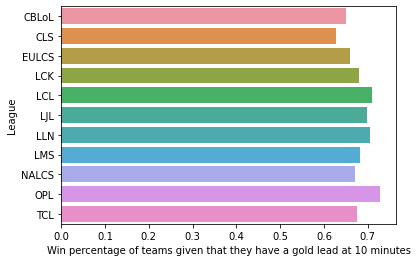

In [22]:
eda_dataset['golddiff_10min'] = eda_dataset.golddiff.str[1:-1].str.split(', ').apply(lambda x: int(x[10]))
eda_dataset['win_given_10min_golddiff'] = (eda_dataset['blue_win'] == 1) == (eda_dataset['golddiff_10min'] > 0)

league_winrate_given_lead_10 = eda_dataset.groupby('League')['win_given_10min_golddiff'].mean().to_frame().reset_index()

winrate_plot = sns.barplot(data=league_winrate_given_lead_10, y='League', x='win_given_10min_golddiff')
winrate_plot.set(xlabel='Win percentage of teams given that they have a gold lead at 10 minutes')

The variance at 10 minutes seems to be higher than at 20 minutes and the winrate is lower, which is expected.

### Visualize distributions of dataset vs wins attributed to gold difference @ 20m

Visualizing distributions of wins and losses vs gold difference per league

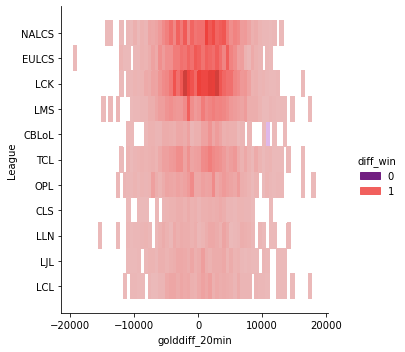

In [23]:
# diff_win = did the team with the gold lead at 20 min win
sns.displot(dataset, x="golddiff_20min", y="League", palette="magma", hue="diff_win");

A visualization of the distributions of wins where the gold difference @ 20m was greater than 0 only.

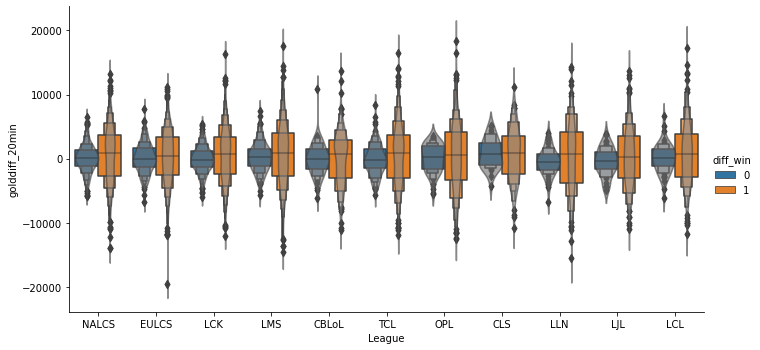

In [24]:
g = sns.catplot(x="League", y="golddiff_20min", hue="diff_win", height=5, aspect=2, kind="boxen", data=dataset)
v = sns.violinplot(x="League", y="golddiff_20min", hue="diff_win", height=5, aspect=2, inner=None, data=dataset, ax=g.ax, saturation=0)
v_children = v.get_children()
for i in v_children:
    if isinstance(i, PolyCollection):
            i.set_alpha(0.6)
g.ax.get_legend().remove()

### Statistically Testing for Significant Difference in Winrate Between Regions

The null hypothesis is that each league has the same winrate (the average over the entire dataset) given that they have the gold advantage at 20 minutes.
The alternate hypothesis is that there is a difference in the winrate of at least one league. We will choose an alpha value of 0.05 for our test.

In [25]:
null_winrate = dataset.diff_win.mean()
null_winrate

0.7745972382048332

In [26]:
observations = dataset.groupby('League')['diff_win'].mean()
observations

League
CBLoL    0.750831
CLS      0.777143
EULCS    0.767061
LCK      0.775779
LCL      0.788530
LJL      0.790698
LLN      0.784232
LMS      0.804376
NALCS    0.742317
OPL      0.835526
TCL      0.763804
Name: diff_win, dtype: float64

The total variation distance, or TVD is a way to calculate how different two catagorical distributions are.

In [27]:
def total_variation_distance(dist1, dist2):
    return np.sum(np.abs(dist1 - dist2))/2

We will be using the TVD between a distribution of winrates across the league given that they have the gold advantage at 20 minutes and the uniform distribution consisting of the null winrate as our test statistic.

In [28]:
observed_tvd = total_variation_distance(observations, [null_winrate]*len(observations))
observed_tvd

0.10424015988563679

Emperically finding distribution of TVDs by permuting the League column

In [29]:
n_repetitions = 10000

shuffled = dataset.copy()
shuffled_leagues = shuffled['League'].values

tvds = []
for _ in range(n_repetitions):
    
    # shuffle leagues
    shuffled_leagues = np.random.permutation(shuffled_leagues)
    
    # put them in a DataFrame
    shuffled['Shuffled League'] = shuffled_leagues
    
    # compute group winrate
    obs = shuffled.groupby('Shuffled League')['diff_win'].mean()
    tvd = total_variation_distance(obs, [null_winrate]*len(obs))
    
    # add it to the list of tvds
    tvds.append(tvd)

The observed TVD overlayed on top of the distribution of TVDs

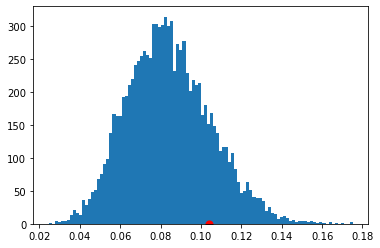

In [30]:
plt.hist(tvds, bins=100)
plt.scatter(x=observed_tvd, y=0, zorder=2, color='red', s=50)
plt.show()

Calculating the p-value using the emperical distribution of TVDs

In [31]:
p_value = (tvds > observed_tvd).mean()
p_value

0.1688

Given that our observed p-value is less extreme than our alpha value, we cannot reject the null hypothesis.

# Ethics & Privacy

Our project identifies the performance trends of teams based on various in-game statistics. All data used is publicly available on Kaggle and players must accept Riot's privacy policy which allows for data collection. As the dataset includes metrics on all aspects of the game, it inherently includes performance data of each individual player, however we will not be using this information in this study since we are analyzing performance on a team-by-team basis.

There may be some implied biases in the dataset due to the difference in number of observations (games) recorded in each league. This bias cannot be outright removed from the dataset without introducing some loss of data fidelity and has a negligible impact on the end result.

# Conclusion & Discussion

From our results in the Data Analysis and Results section, we have determined that there is not a statistically significant difference between the leagues in the ability for their teams to close out games in their own home region. Looking more at other intangibles, it makes more sense that this is the case. In each league, there are top teams and bottom teams and the round robin format of the league makes it so that it is not always a foregone conclusion for a team to gain a lead and win. Comparatively, in international play, teams from better regions are more than likely able to close out their games because there is more of a skill gap, especially between major regions (regions that have large player bases and have historically done well at international events) like the LCK and minor regions (regions with smaller player bases and have historically not done as well) like the CBLoL.

What other factors could go into this result that was found? In the game of League of Legends, there are comeback mechanics for teams to be able to recover from a fumbled early game and allow themselves to claw their way back into the game and thus win the game. Super objectives like the Baron Nashor and Elder Dragon give opportunities for teams to win a fight and proceed to win the game, all while not having regained a gold lead.

Thus, we can deduce that even though a gold lead at 20 minutes is a contributing factor to a team's success, it is not the only factor. We can also see that skill in a region does not necessarily equate to better quality of games in terms of how cleanly executed a team with a lead plays. Therefore, the quality of region a game is in does not determine whether or not a team with a gold lead will be able to win or not.

# Team Contributions

*Specify who in your group worked on which parts of the project.*

- Justin Chu: Conclusion and Dicussion
- John Li: Ethics and Privacy
- Luke Lloyd: Data Analysis and Results
- Prathik Malireddy: Data Analysis and Results
- Dustin Lin: Background and Prior work